In [1]:
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv('drug200.csv')

dataset = data

data = data.replace({'F':0, 'M':1})

data['BP'] = data['BP'].replace(['LOW', 'NORMAL', 'HIGH'], [1,2,3])

data['Cholesterol'] = data['Cholesterol'].replace(['NORMAL','HIGH'], [1,2])

data['Drug'] = data['Drug'].replace(['drugY', 
                                     'drugC', 
                                     'drugX', 
                                     'drugA', 
                                     'drugB'], [1,2,3,4,5])

<Axes: >

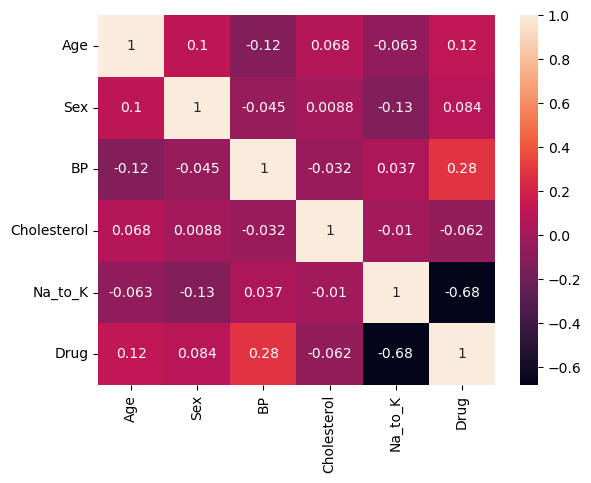

In [3]:
sns.heatmap(data.corr(), annot=True)


In [4]:
train_input, test_input, train_output, test_output = train_test_split(
    data.drop('Drug', axis=1),
    data['Drug'],
    test_size=0.3
)

model = tree.DecisionTreeClassifier()
model.fit(train_input, train_output)


1.0


Text(0.5, 1.0, 'Матрица сходства')

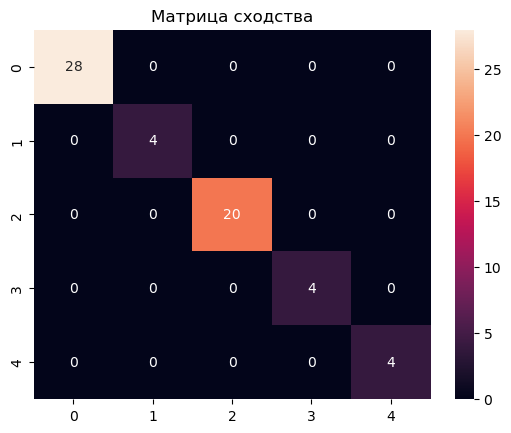

In [12]:
predictions = model.predict(test_input)

print(sum(predictions == test_output)/len(predictions))

confusion_matrix = sklearn.metrics.confusion_matrix(predictions, test_output)
sns.heatmap(
 confusion_matrix,
 annot=True
)
plt.title('Матрица сходства')


Text(0.5, 1.0, 'Дерево решений')

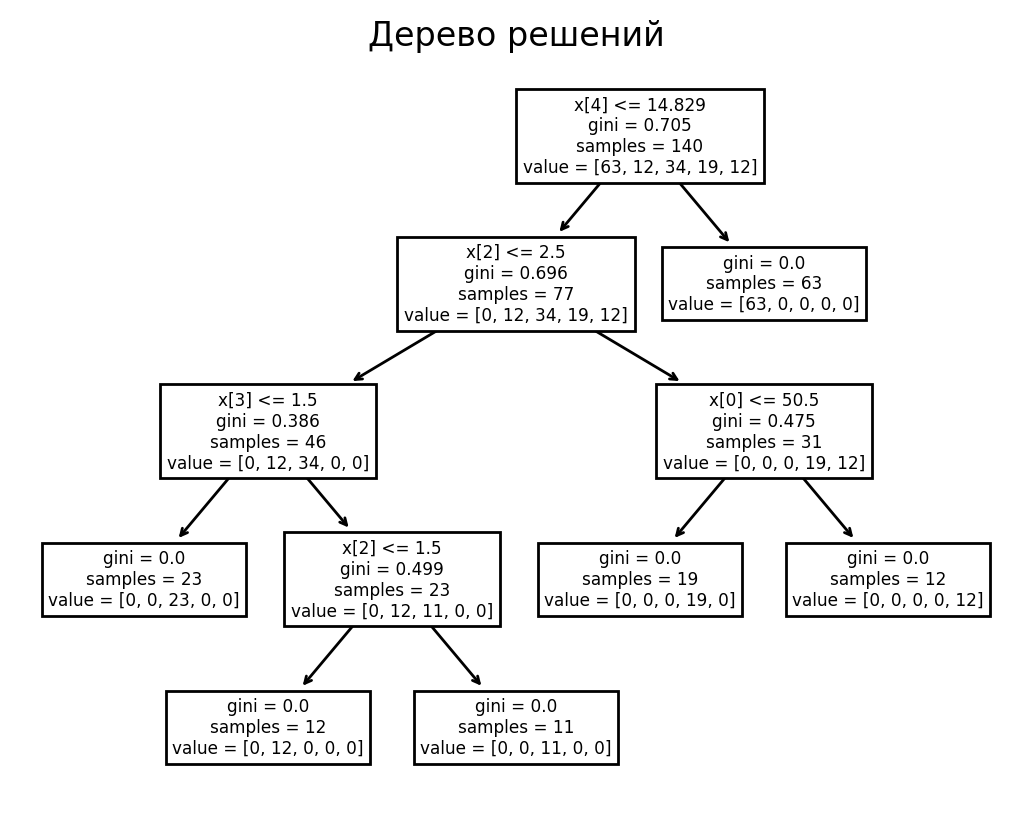

In [14]:
DPI = 200
plt.figure(dpi=DPI)
tree.plot_tree(model)
plt.title("Дерево решений")